Libraries and styles

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
pd.options.display.max_columns = 200

# Data Preparation

Reading

In [25]:
df = pd.read_csv("coaster_db.csv")
# df.head()

Limiting columns

In [26]:
df = df[['coaster_name', 
    #'Length', 'Speed',
     'Location', 'Status',
      # 'Opening date',
      # 'Type', 
      'Manufacturer', 
      #'Height restriction', 'Model', 'Height',
       #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
      # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
      # 'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
      # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
      # 'Single rider line available', 'Restraint Style',
      # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean',
      #  'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
       #'height_value', 'height_unit',
     'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

Number of columns and rows

In [27]:
print(df.shape[1], df.shape[1]) # Columns
print(df.shape[0], df.shape[0]) # Rows

13 13
1087 1087


Dropping column(s)

In [28]:
no_location_df = df.drop(["Location"], axis=1)
no_status_no_manufacturer_df = df.drop(["Status", "Manufacturer"], axis=1)

Viewing data types

In [29]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

Convert data types

In [30]:
# DATE TIME

df["opening_date_clean"] = df["opening_date_clean"].astype("datetime64[ns]") # or [us]
# OR: 
# pd.to_datetime(df_sub["opening_date_clean"])

# NUMERIC VALUES

df["year_introduced"] = df["year_introduced"].astype(int)

# OR:
# pd.to_numeric(df_sub["year_introduced"])

Rename column names

In [31]:
df = df.rename(columns={'coaster_name':'Coaster_Name',
                       'year_introduced':'Year_Introduced',
                       'opening_date_clean':'Opening_Date',
                       'speed_mph':'Speed_mph',
                       'height_ft':'Height_ft',
                       'Inversions_clean':'Inversions',
                       'Gforce_clean':'Gforce'})

Size of missing values for each column 

In [32]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

Duplicated values

In [33]:
df.loc[df.duplicated()] # In this whole dataset, there are no duplicate values

df.loc[df.duplicated(subset=["Coaster_Name"])].shape[0] # Number of duplicates in the column "Coster_Name" (Remove .shape[0] to see the actual rows that are duplicates)

97

Queries

In [34]:
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


Remove duplicates

In [35]:

df = df.loc[~df.duplicated(subset=["Coaster_Name", "Location", "Opening_Date"])].reset_index(drop=True).copy() 

# Attention: ~ : Taking the inverse: Locating all Non-Duplicates
# Indices are now not increasing + 1 + 1 + 1 because we dropped 
# drop=True is important to to remove the original index

# Feature understanding

Count unique values

In [36]:
df["Year_Introduced"].value_counts().head()

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
Name: count, dtype: int64

Plot unique values (Bar plot)

Text(0, 0.5, 'Count of roller coasters')

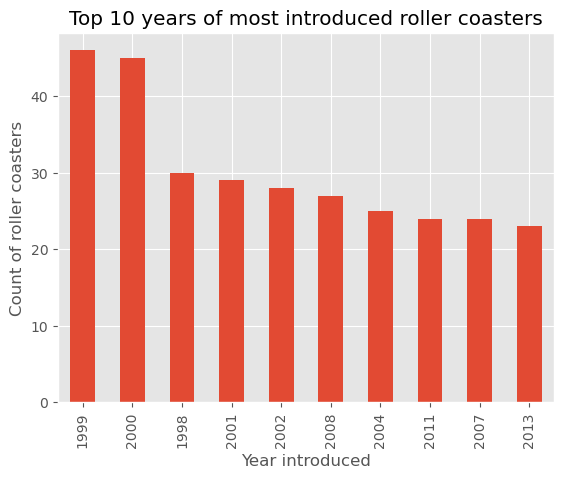

In [37]:
ax = df["Year_Introduced"].value_counts()\
                    .head(10) \
                    .plot(kind="bar", title="Top 10 years of most introduced roller coasters")

ax.set_xlabel("Year introduced")
ax.set_ylabel("Count of roller coasters")

Distribution of feature (Histogram)

<Axes: ylabel='Frequency'>

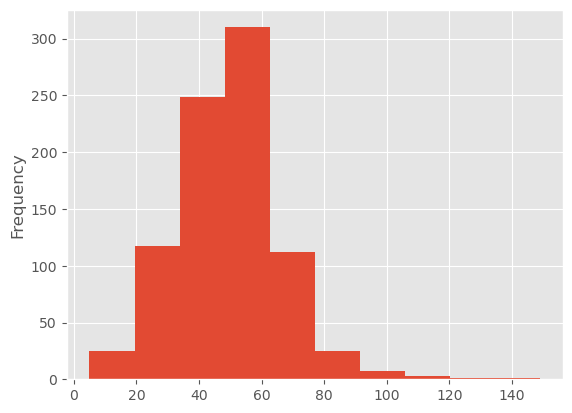

In [38]:
df["Speed_mph"].plot(kind="hist", bins=10)

Density plot

<Axes: ylabel='Density'>

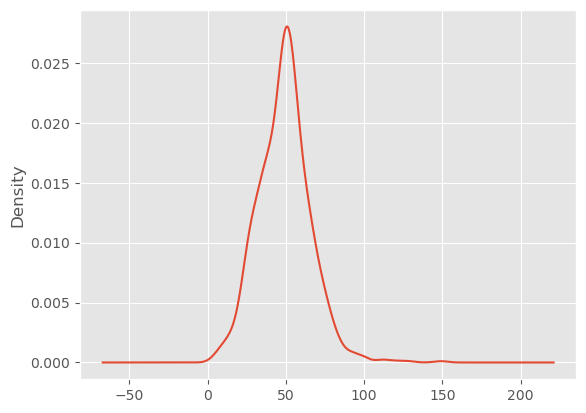

In [39]:
df["Speed_mph"].plot(kind="kde")

# Feature relationship

Scatter plot

<Axes: xlabel='Speed_mph', ylabel='Height_ft'>

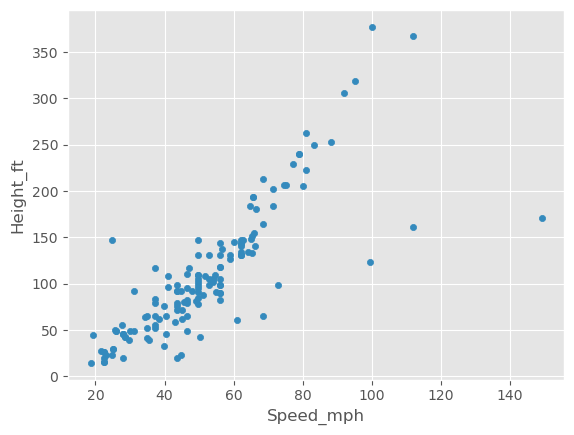

In [40]:
df.plot(kind="scatter", x="Speed_mph", y="Height_ft")

Seaborn scatter plot

<Axes: xlabel='Speed_mph', ylabel='Height_ft'>

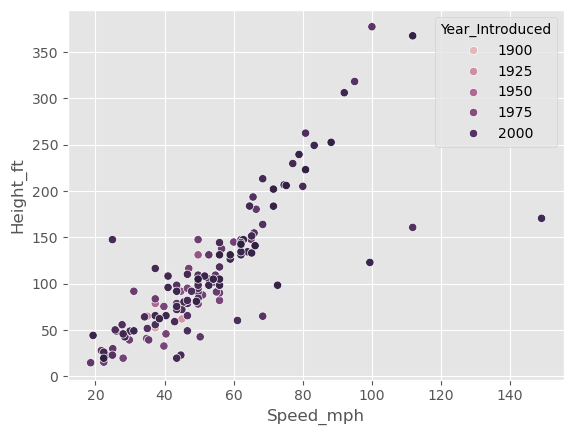

In [41]:
sns.scatterplot(x="Speed_mph", y="Height_ft", hue="Year_Introduced", data=df) 

# Hue colors the dots based on the given feature (Here: Year_Introduced)

Compare multiple features

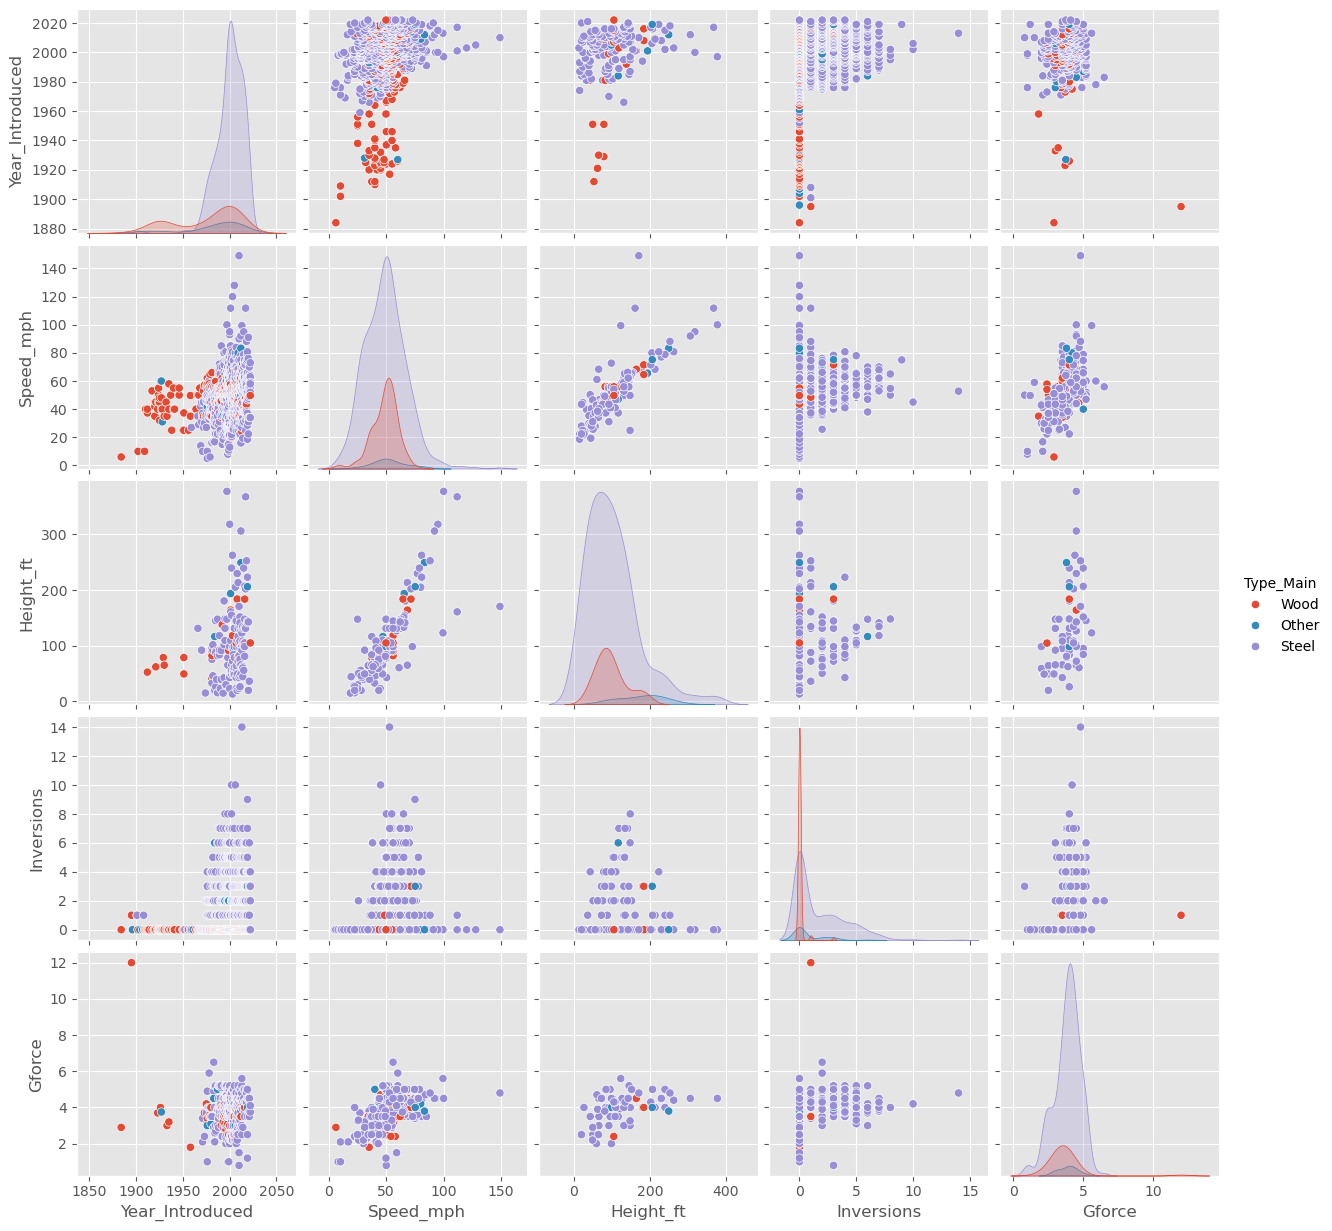

In [42]:
sns.pairplot(data=df, vars=['Year_Introduced','Speed_mph',
                   'Height_ft','Inversions','Gforce'],
            hue='Type_Main')

Correlations

In [43]:
df_corr = df[['Year_Introduced','Speed_mph','Height_ft','Inversions','Gforce']].dropna().corr()

Heatmap

<Axes: >

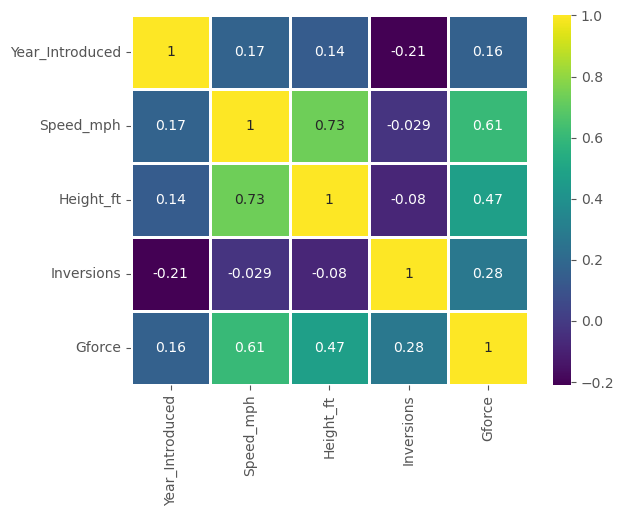

In [44]:
sns.heatmap(df_corr, cmap="viridis", linewidths=1, annot=True)

# Answering questions about the data

What are the locations with the fastest roller coasters (minimum of 10 roller coasters)?

<Axes: ylabel='Location'>

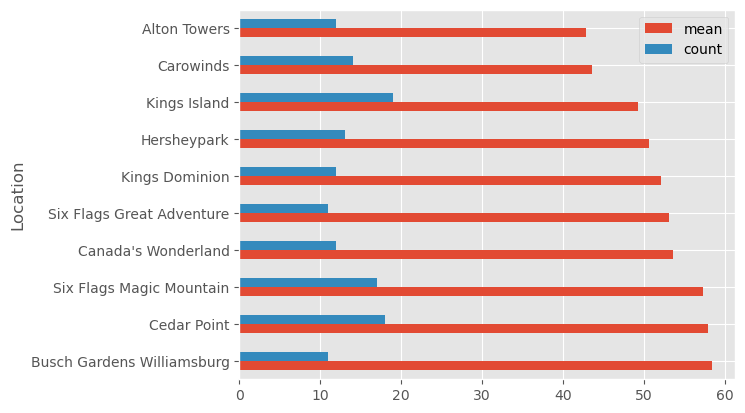

In [45]:
df.query('Location != "Other" ') \
.groupby("Location") \
.Speed_mph.agg( ["mean", "count"] ) \
.query('count >= 10') \
.sort_values(by="mean", ascending=False) \
.plot(kind="barh")